<a href="https://colab.research.google.com/github/jessicamadridmejia/EIA-Diplomado-IA-Modulo3/blob/master/ML_Example_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de KNN con la base de datos Iris

Ahora descargue la base de datos de iris y súbala a los archivos

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
dataframe = pd.read_csv("iris.csv", header=None)
dataset = dataframe.values
X = dataset[:,0:-1].astype(float)
Y = dataset[:,-1]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [0]:
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([40, 40, 40]))
(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([10, 10, 10]))


In [0]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


In [0]:
knn = KNeighborsClassifier(n_neighbors=2,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [0]:
train_accuracy= knn.score(X_train, y_train)
test_accuracy=knn.score(X_test, y_test)
print(train_accuracy)
print(test_accuracy)

0.975
0.9333333333333333


In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
y_pred = knn.predict(X_test)

In [0]:
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,10,0,0,10
Iris-versicolor,0,10,0,10
Iris-virginica,0,2,8,10
All,10,12,8,30


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



In [0]:
y_pred_proba=knn.predict_proba(X_test)
y_pred_proba

array([[1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ]])

In [0]:
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test) 

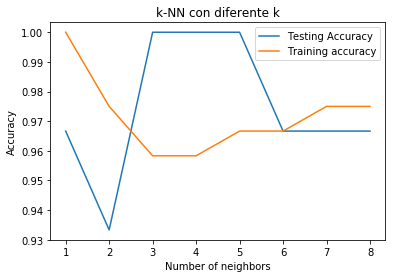

In [0]:
plt.title('k-NN con diferente k')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [0]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [0]:
knn.predict([[0.8, 1,0.6,3],[4, 1,1,5]])

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

Para probar parámetros como en el K-NN la K, se puede también utilizar la siguiente función

In [0]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}

In [0]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
print(knn_cv.best_score_,knn_cv.best_params_)

0.975 {'n_neighbors': 5}


## Validación Cruzada

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold

scoring = ['precision_macro', 'recall_macro']
knn = KNeighborsClassifier()
scores = cross_validate(knn, X,Y, scoring=scoring, cv=10)

In [0]:
sorted(scores.keys())

['fit_time',
 'score_time',
 'test_precision_macro',
 'test_recall_macro',
 'train_precision_macro',
 'train_recall_macro']

In [0]:
scores['test_recall_macro'].mean()

0.9666666666666666

Para el resto de los clasificadores use:

MLP: from sklearn.neural_network import MLPClassifier
SVM: from sklearn import svm

In [0]:
from sklearn.neural_network import MLPClassifier
#Ejemplo de un MLP con dos capas con 5 y 2 neuronas respectivamente
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)


In [0]:
from sklearn import svm
from sklearn.svm import SVR

In [0]:

#Diferentes kernels de SVM
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)